## What is a Genetic Algorithm?

It is a optimization algorithm inspired on the ideia of *Evolution of Species* through *Natural Selection*.
There basic parts of it are::
- Initial population: set of individuals wtih different caractheristics.
- Fitness function: a way to evaluate how fitted for survival each indidual is.
- Selection: step of selecting the fittest individuals that will pass genes to the next generation.
- Crossover: mixture of the genes from each parent individual.
- Mutation: random mutations that occur in the offspring



A pseudo algorithm could be:
1. set convergence rule
1. current population = initial population
1. while not converged: 
    1. calculate fitness score of each individual in current population
    1. select fittest
    1. set offspring = crossover of fittest
    1. do mutation step to offspring
    1. current population = offspring


### Simple Example
Problem: We want guess a secret phrase. We only know the lenght of the solution.

Each individual is a string of letters (a list of characters). At first, random.

Our fitness score is the number of correct letters in the correct positions.

### Glossary

Allele
Chromosome
Individual
Population
Generation
Fitness
Mating/Crossover
Mutation

In [9]:
from string import ascii_letters

# Hyperparameters
GEN_LIMIT = 100
POP_SIZE = 100
MATING_PROP = 0.20 # selects top 20% fittest
MUTATION_PROB = 0.1

ALLELES = list(ascii_letters + " ") # set of possible ALLELES
ALLELES_SIZE = len(ALLELES) # set size

MATING_N = int(POP_SIZE * MATING_PROP)

SOLUTION = list("Hello World") # IRL we don't know this
CHROMOSOME_SIZE = len(SOLUTION) # number of ALLELES in  each individual

In [13]:
pop_scores

0.25

<AxesSubplot:xlabel='generation', ylabel='best_score'>

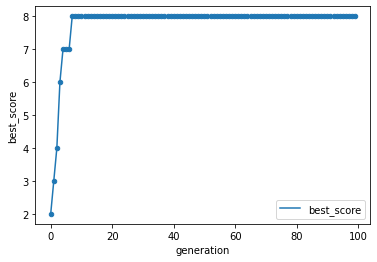

In [30]:
from random import choices
import numpy as np
# objective fun
def func_fitness(individual):
    return sum(x==y for x,y in zip(individual, SOLUTION))

def calc_fitness_scores(pop, func_fitness, *args, **kwargs):
    return [func_fitness(individual, *args, **kwargs) for individual in pop]

def calc_fittests_ranks(scores):
    return np.argsort(scores)[::-1]

def select_top_fittests(pop, fittests_ranks, n):
    return [pop[i] for i in fittests_ranks[:n]]

def mate_pair(parent1, parent2):
    """For a pair of parents, return two offspring with random chromossomes from one or the other parent, alternating."""
    picks = choices([False, True], k=CHROMOSOME_SIZE)

    child1 = [a if pick else b for pick, a,b in zip(picks, parent1, parent2)]
    child2 = [b if pick else a for pick, a,b in zip(picks, parent1, parent2)]

    return child1, child2

def mate_random_pairs(pop, new_pop_size):

    n_pairs = (new_pop_size+1)//2

    parents = choices(pop, k = 2 * n_pairs)

    offspring = []
    for i in range(0, 2 * n_pairs, 2):
        offspring.extend(mate_pair(parents[i], parents[i+1]))
    
    return offspring[:new_pop_size]

def mutate(pop, mutate_prob):
    """No mutation for now"""
    return pop





pop = [choices(ALLELES, k = CHROMOSOME_SIZE) for _ in range(POP_SIZE)]

metrics = []
for i in range(GEN_LIMIT):
    
    # 1. calculate fitness score of each individual in current population
    pop_scores = calc_fitness_scores(pop, func_fitness)
    pop_ranks = calc_fittests_ranks(pop_scores)
    
    # store metrics about current generation
    metrics.append(dict(
        generation=i,
        best_individual=pop[pop_ranks[0]],
        best_score=pop_scores[pop_ranks[0]],
    ))
    
    # 1. select
    mating_pop = select_top_fittests(pop, pop_ranks, n = MATING_N)

    # 1. crossover
    pop = mate_random_pairs(mating_pop, len(pop))
    
    # 1. mutate
    pop = mutate(pop, mutate_prob=MUTATION_PROB)


import pandas as pd

dfmetrics = pd.DataFrame(metrics)
ax = dfmetrics.plot.line('generation','best_score')
dfmetrics.plot.scatter('generation','best_score', ax=ax)
